In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.pyplot import figure
from collections import Counter

In [2]:
df = pd.read_excel('depression_20231122_m.xlsx', 
                                     sheet_name="depression", 
                                     usecols="A,B,C,D,E,F,G,H")

df

,NDRIs,SSRIs,SARIs,SNRIs,Tetracyclic_antidepressants,TCAs,Author,Year
0,1.0,1,1,1,1,1.0,Hripcsak,2016
1,NaN,1,1,1,1,NaN,Zhang,2018
2,1.0,1,1,1,1,1.0,Markus,2022
3,1.0,1,1,1,1,1.0,*Chen,2020


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   NDRIs                        3 non-null      float64
 1   SSRIs                        4 non-null      int64  
 2   SARIs                        4 non-null      int64  
 3   SNRIs                        4 non-null      int64  
 4   Tetracyclic_antidepressants  4 non-null      int64  
 5   TCAs                         3 non-null      float64
 6   Author                       4 non-null      object 
 7   Year                         4 non-null      int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 388.0+ bytes


In [4]:
df.NDRIs
N = len(df.NDRIs); N
noc=6

In [5]:
N

4

In [6]:
noc

6

In [7]:
years = np.array([df.Year[i] for i in range(0, N)])
names = np.array([df.Author[i] for i in range(0, N)])
years_sorted_indices = np.argsort(years)
years_sorted = np.sort(years)

names_sorted = []
for el in years_sorted_indices:
    names_sorted.append(names[el])
years_sorted = np.flip(years_sorted)
names_sorted = np.flip(names_sorted)
years_sorted_indices = np.flip(years_sorted_indices)

In [8]:
years_sorted_indices

array([2, 3, 1, 0], dtype=int64)

In [9]:
arr1 = np.array([df.NDRIs[i] for i in range(N)])
arr2 = np.array([df.SSRIs[i] for i in range(N)])
arr3 = np.array([df.SARIs[i] for i in range(N)])
arr4 = np.array([df.SNRIs[i] for i in range(N)])
arr5 = np.array([df.Tetracyclic_antidepressants[i] for i in range(N)])
arr6 = np.array([df.TCAs[i] for i in range(N)])

all_arrs = np.array([arr1, arr2, arr3, arr4, arr5, arr6])

In [10]:
all_arrs

array([[ 1., nan,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1., nan,  1.,  1.]])

In [11]:
arr_sorted = []
for el in all_arrs:
    arri_sorted = []
    for a in years_sorted_indices:
        arri_sorted.append(el[a])
    arr_sorted.append(arri_sorted)
arr_sorted = np.array(arr_sorted)

In [12]:
arr_sorted

array([[ 1.,  1., nan,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1., nan,  1.]])

In [13]:
print(df.isna())

   NDRIs  SSRIs  SARIs  SNRIs  Tetracyclic_antidepressants   TCAs  Author  \
0  False  False  False  False                        False  False   False   
1   True  False  False  False                        False   True   False   
2  False  False  False  False                        False  False   False   
3  False  False  False  False                        False  False   False   

    Year  
0  False  
1  False  
2  False  
3  False  


In [14]:
x = []
y = []
for el in arr_sorted:
    ind = 1
    for a in el:
        if a != 'nan':
            y.append(ind)
        else:
            y.append(0)
        ind += 1
y = np.array(y)
for i in range(N*len(arr_sorted)):
    x.append(int(i/N))
x = np.array(x)

In [15]:
x

array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5,
       5, 5])

In [16]:
y

array([1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2,
       3, 4])

In [17]:
x_cols = []
y_cols = []
row = []
row2 = []
for i in range(noc*N):
    row.append(x[i])
    row2.append(y[i])
    if (i+1)%N == 0:
        x_cols.append(row)
        y_cols.append(row2)
        row = []
        row2 = []

In [18]:
x_hist = []
x_hist_cols = []
ind = 0
for el in y:
    if el != 0:
        x_hist.append(int(ind/N))
    ind += 1
k = 0
row = []
for el in x_hist:
    if el == k+1:
        k+=1
        x_hist_cols.append(row)
        row = []
    row.append(el)
x_hist_cols.append(row)

In [19]:
x_hist_cols

[[0, 0, 0, 0],
 [1, 1, 1, 1],
 [2, 2, 2, 2],
 [3, 3, 3, 3],
 [4, 4, 4, 4],
 [5, 5, 5, 5]]

In [20]:
x_cols

[[0, 0, 0, 0],
 [1, 1, 1, 1],
 [2, 2, 2, 2],
 [3, 3, 3, 3],
 [4, 4, 4, 4],
 [5, 5, 5, 5]]

In [21]:
y_cols

[[1, 2, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 3, 4]]

In [22]:
y_cols = [[1, 2, np.nan, 4],
 [1, 2, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 3, 4],
 [1, 2, np.nan, 4]]

In [23]:
y_cols

[[1, 2, nan, 4],
 [1, 2, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 3, 4],
 [1, 2, nan, 4]]

In [24]:
x_hist_cols = [[0, 0, np.nan, 0],
 [1, 1, 1, 1],
 [2, 2, 2, 2],
 [3, 3, 3, 3],
 [4, 4, 4, 4],
 [5, 5, np.nan,5]]

In [25]:
x_hist_cols

[[0, 0, nan, 0],
 [1, 1, 1, 1],
 [2, 2, 2, 2],
 [3, 3, 3, 3],
 [4, 4, 4, 4],
 [5, 5, nan, 5]]

In [26]:
hfont = {'fontname':'Times New Roman'}

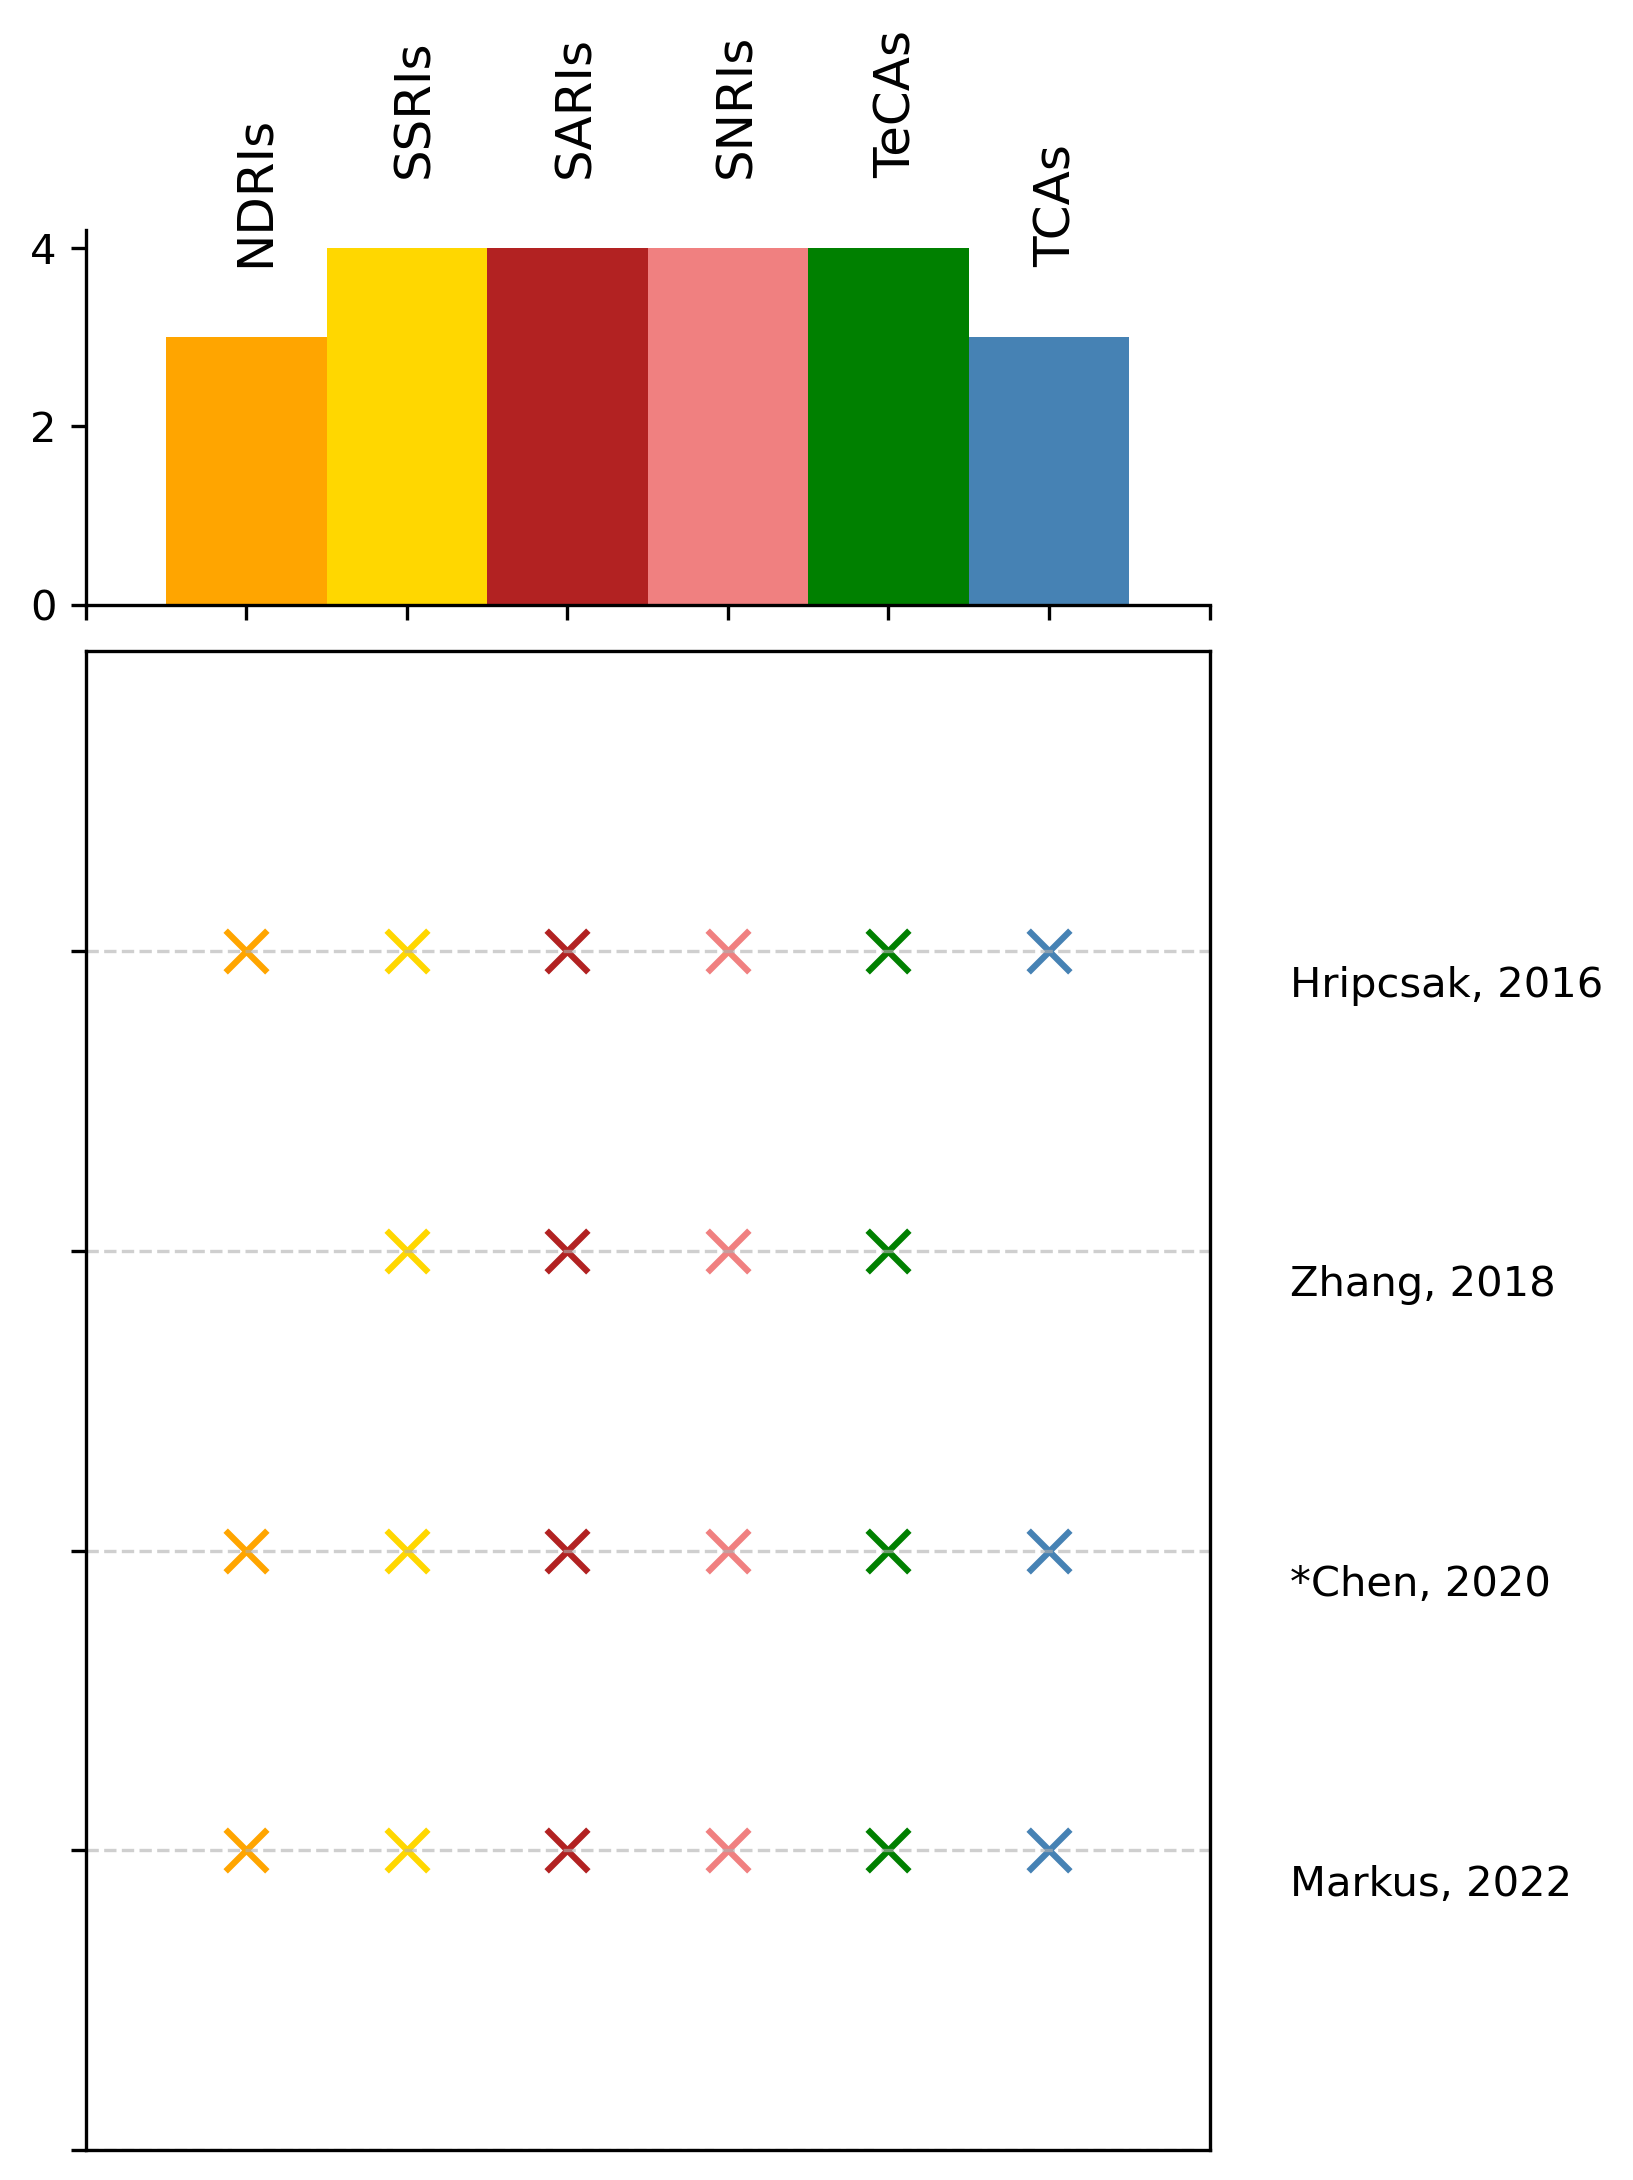

In [27]:
colors = ["orange", "gold", "firebrick", "lightcoral", "green", "steelblue"]
def scatter_hist(x, y, ax, ax_histx):
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax.set_xlim([-1,6])
    ax.set_ylim([0, 5])
    
    for i in range(noc):
        ax.scatter(x_cols[i], y_cols[i], s=100, marker ='x', color = colors[i], alpha = 1)
    
    ax.set_yticks(np.array([i for i in range(N+1)]))
    ax.axes.get_xaxis().set_visible(False)
    
    vec = np.array([i for i in range(10)])
    zeros = np.zeros(10)
    ax.plot(vec, zeros, 'ws')
    i = 1
    for l in range(len(names_sorted)):
        string = names_sorted[l]+', '+str(years_sorted[l])
        ax.text(6.5, i-0.15, string)
        i += 1
    ax.grid(which='major', axis = 'y', linestyle = '--', alpha = 0.6)
    ax.grid(True)
    ax.set_yticklabels([])

    binwidth = 1
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)

    heights = []
    for i in range(noc):
        heights.append(ax_histx.hist(x_hist_cols[i],align='left', bins=bins, color = colors[i])[0])
    right_side = ax_histx.spines["right"]
    right_side.set_visible(False)
    top_side = ax_histx.spines["top"]
    top_side.set_visible(False)
    return heights

fig = plt.figure(figsize=(6, 8), dpi=300)
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)

heights = scatter_hist(x, y, ax, ax_histx)
real_heights = []

for el in heights:
    real_heights.append(max(el))
    
mylabels = ['NDRIs', 'SSRIs', 'SARIs', 'SNRIs', 'TeCAs', 'TCAs']

for i in range(len(mylabels)):
    plt.text(-0.1+i, real_heights[i]+0.9, mylabels[i], rotation=90, fontsize=12)

plt.savefig('Figure 5', bbox_inches='tight')